In [1]:
pip install mlflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 44.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 49.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 681.8/681.8 kB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.6/65.6 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.0/120.0 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.6/201.6 kB 12.5 MB/s eta 0:00:00


In [2]:
import mlflow

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
df=pd.read_csv('cancer_clean.csv')

In [41]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [42]:
df.shape

(569, 31)

In [43]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [44]:
x=df.drop('diagnosis',axis=1)
y=df['diagnosis']

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

model1=LogisticRegression()
model1.fit(x_train,y_train)
y_pred=model1.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           B       0.95      0.99      0.97        71
           M       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [46]:
report_dict = classification_report(y_test, y_pred, output_dict=True)
report_dict

{'B': {'precision': 0.9459459459459459,
  'recall': 0.9859154929577465,
  'f1-score': 0.9655172413793104,
  'support': 71.0},
 'M': {'precision': 0.975,
  'recall': 0.9069767441860465,
  'f1-score': 0.9397590361445783,
  'support': 43.0},
 'accuracy': 0.956140350877193,
 'macro avg': {'precision': 0.960472972972973,
  'recall': 0.9464461185718964,
  'f1-score': 0.9526381387619444,
  'support': 114.0},
 'weighted avg': {'precision': 0.9569049312470365,
  'recall': 0.956140350877193,
  'f1-score': 0.9558014271241044,
  'support': 114.0}}

In [ ]:
params={
    "test_size":0.2,
    "random_state":42,
    "model":"Logistic Regression",
    "solver": model1.solver,
    "penalty": model1.penalty,
    "C": model1.C,
    "max_iter": model1.max_iter,
}

metrics = {
        "accuracy": accuracy_score(y_test, y_pred),
        "precision_B": report_dict["B"]["precision"],
        "recall_B": report_dict["B"]["recall"],
        "f1_B": report_dict["B"]["f1-score"],
        "precision_M": report_dict["M"]["precision"],
        "recall_M": report_dict["M"]["recall"],
        "f1_M": report_dict["M"]["f1-score"],
        "macro_f1": report_dict["macro avg"]["f1-score"],
        "weighted_f1": report_dict["weighted avg"]["f1-score"]
    }


In [ ]:
mlflow.set_tracking_uri("https://319dcc770054.ngrok-free.app")
mlflow.set_experiment("Breast Cancer Prediction (Logistic Regression)")

<Experiment: artifact_location='mlflow-artifacts:/891147630145012847', creation_time=1753725365570, experiment_id='891147630145012847', last_update_time=1753725365570, lifecycle_stage='active', name='Breast Cancer Prediction (Logistic Regression)', tags={}>

In [ ]:
mlflow.log_params(params)
mlflow.log_metrics(metrics)

 # Log model
mlflow.sklearn.log_model(model1, "Initial model")

2025/07/28 18:21:36 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/28 18:21:44 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


# **Outliers** :

# **1-Box plot and IQR :**

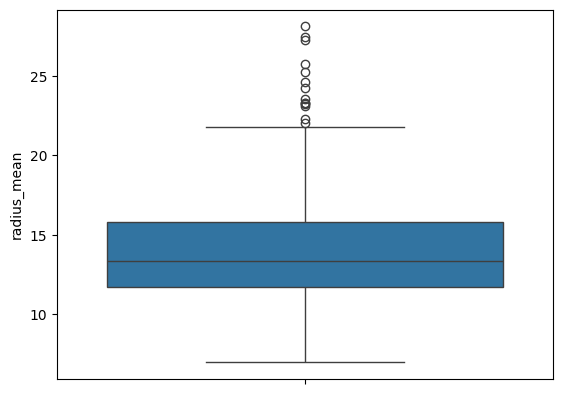

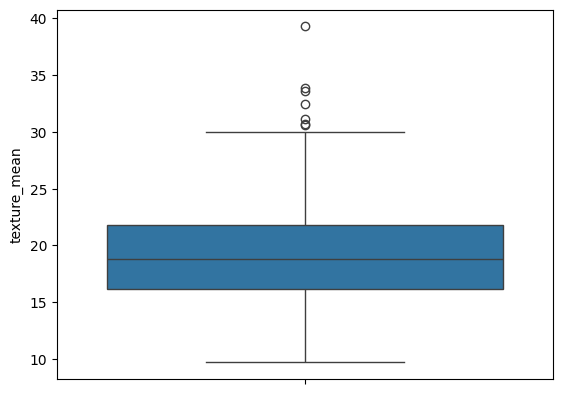

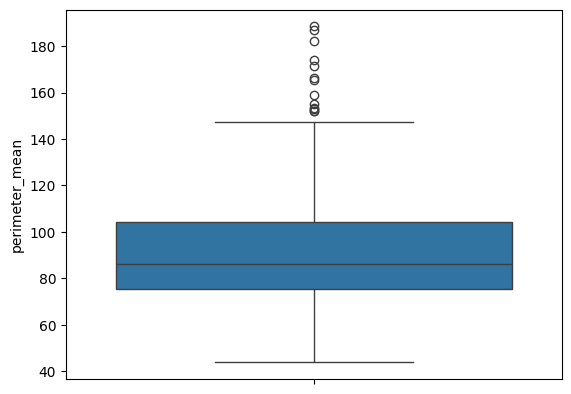

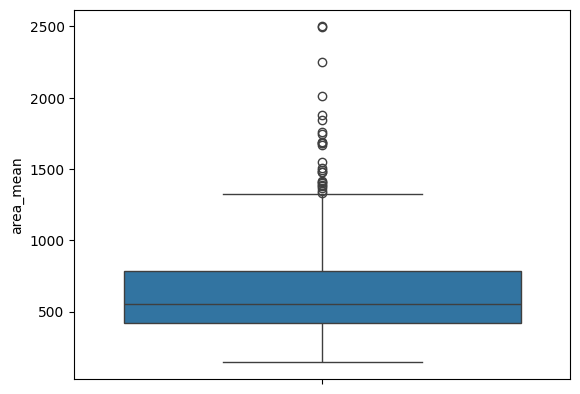

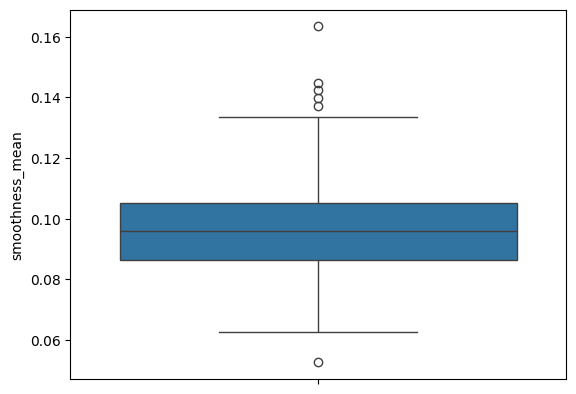

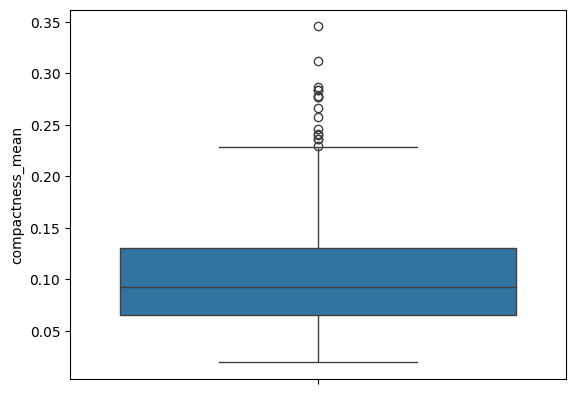

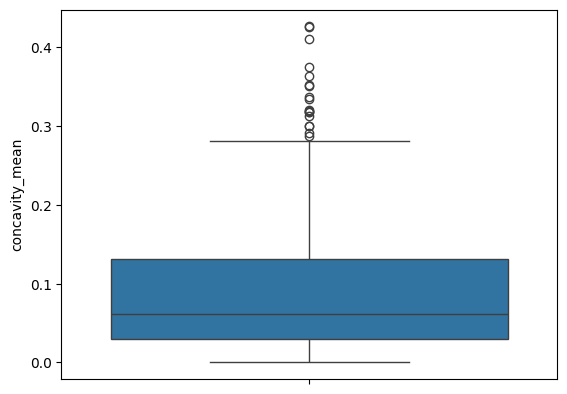

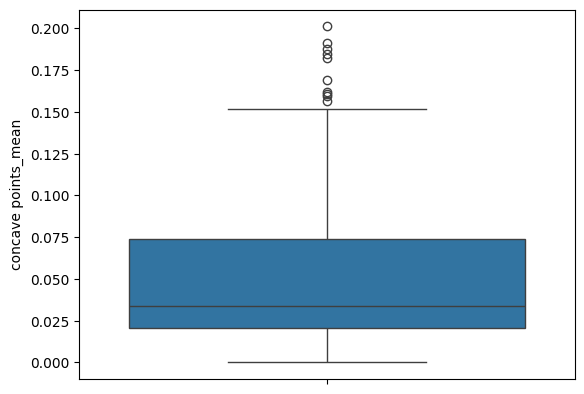

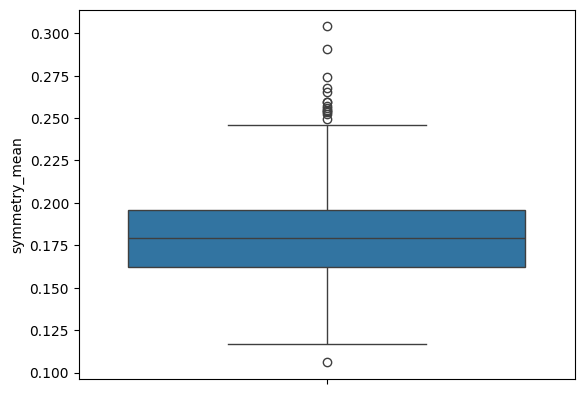

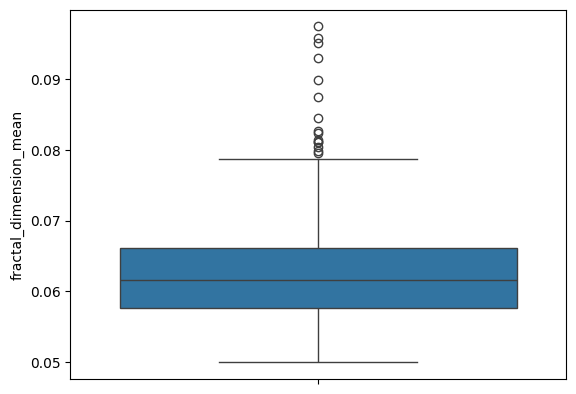

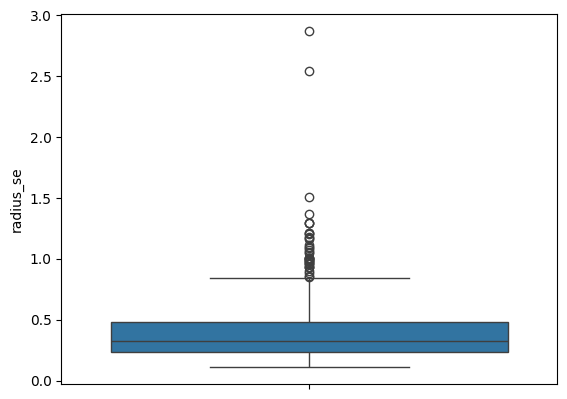

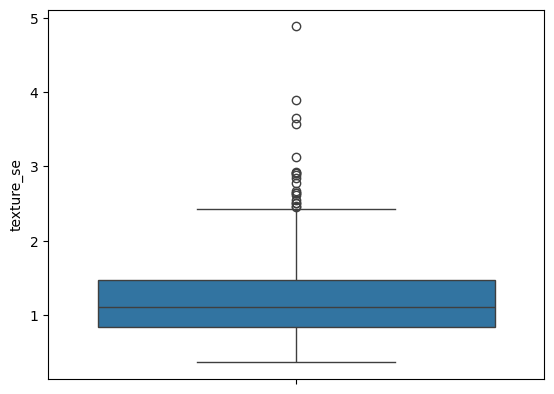

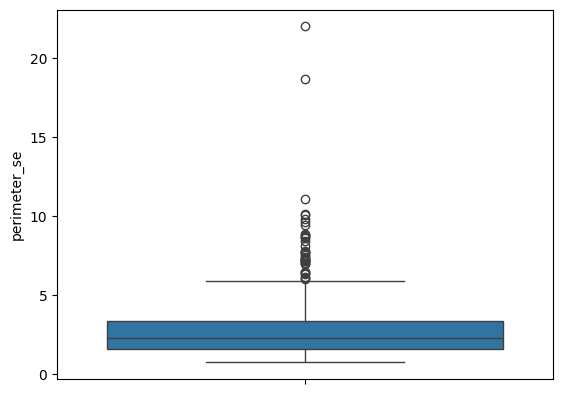

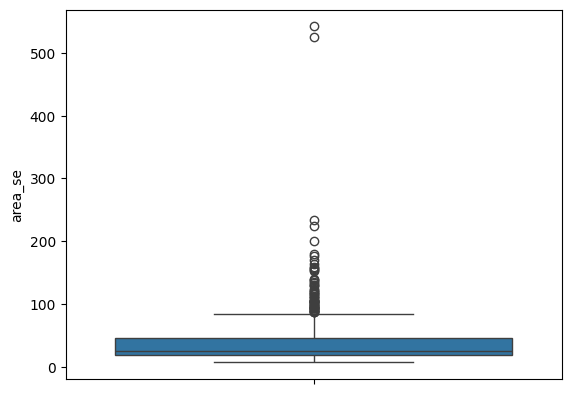

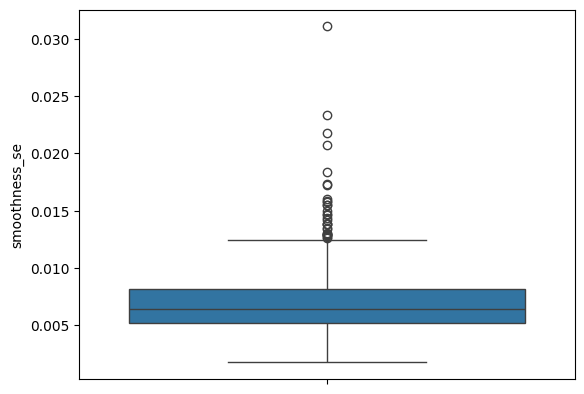

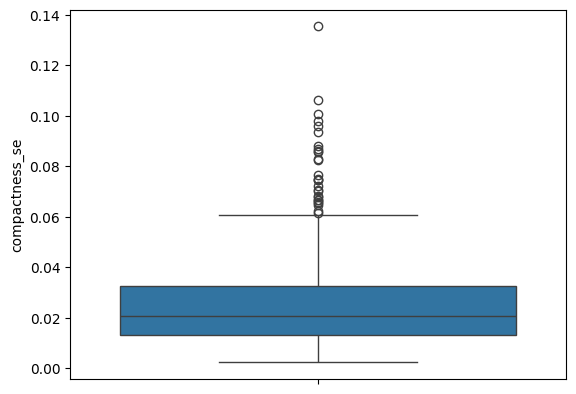

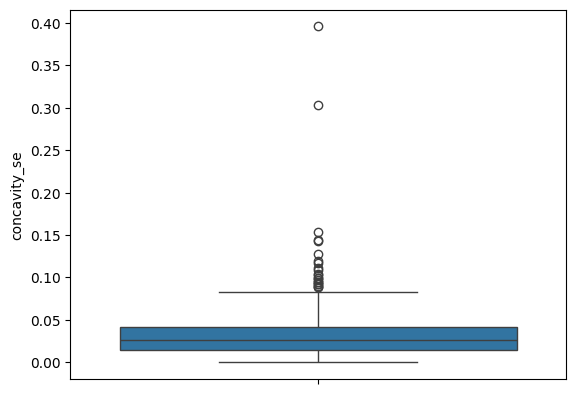

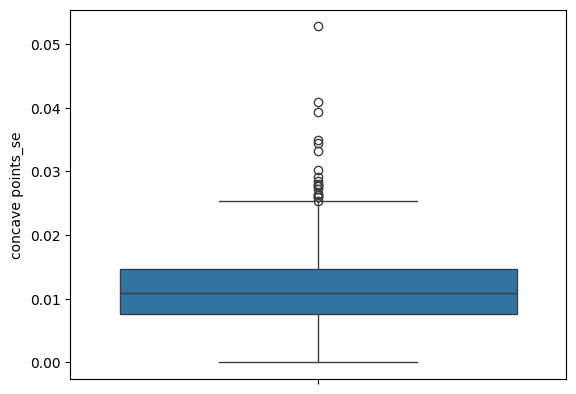

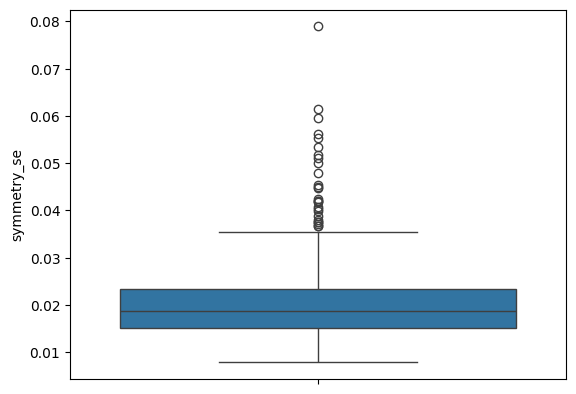

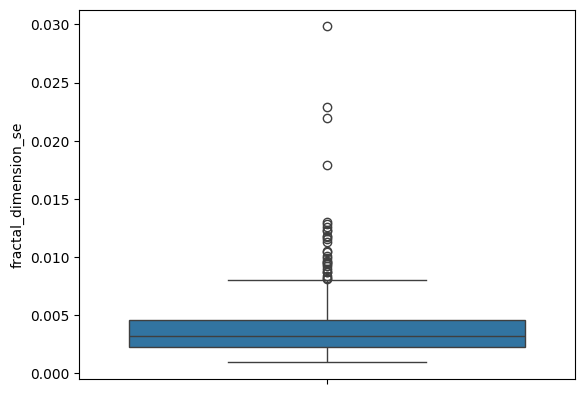

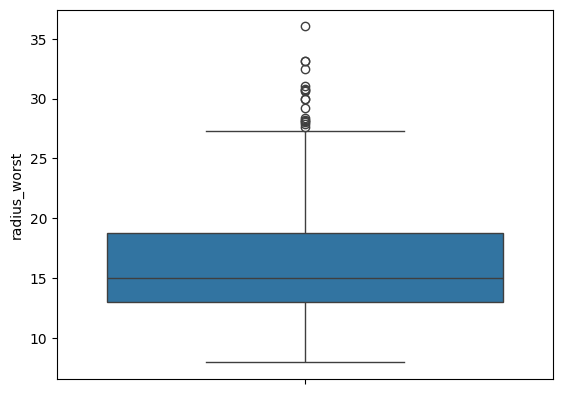

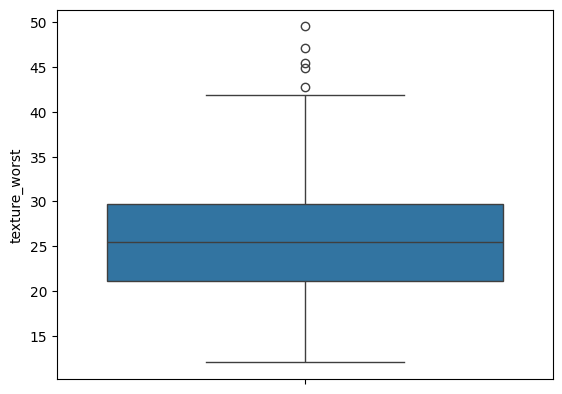

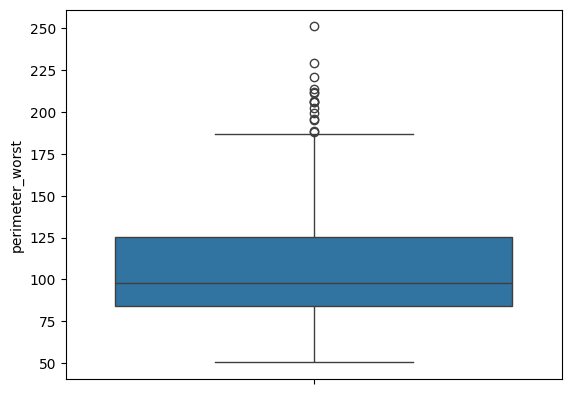

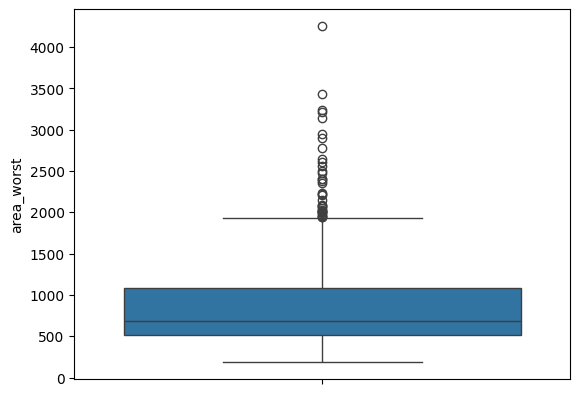

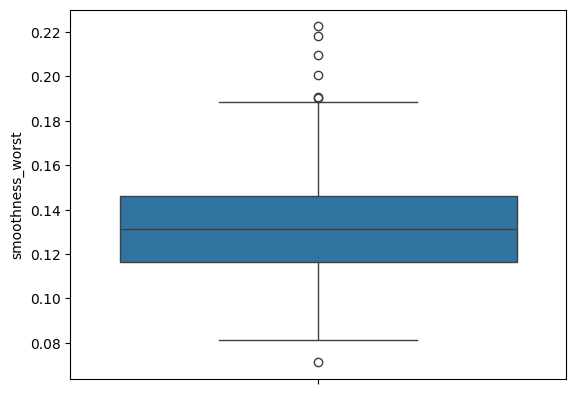

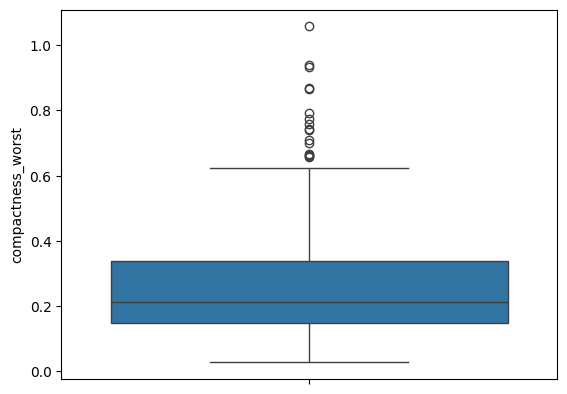

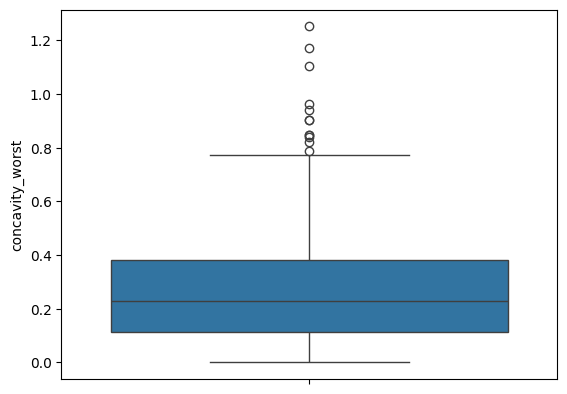

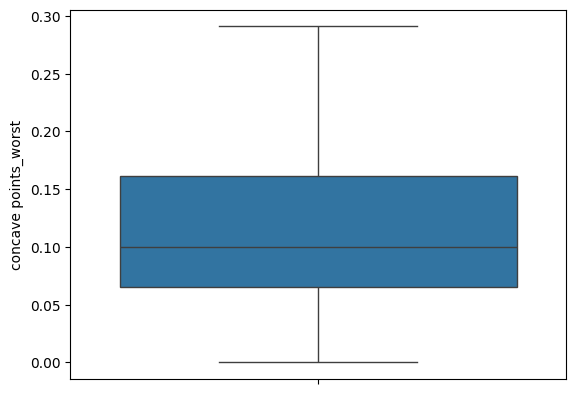

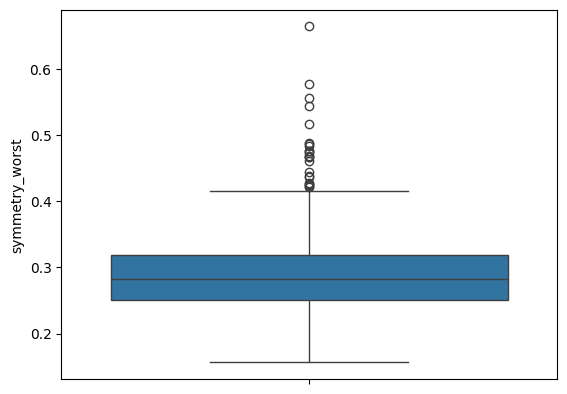

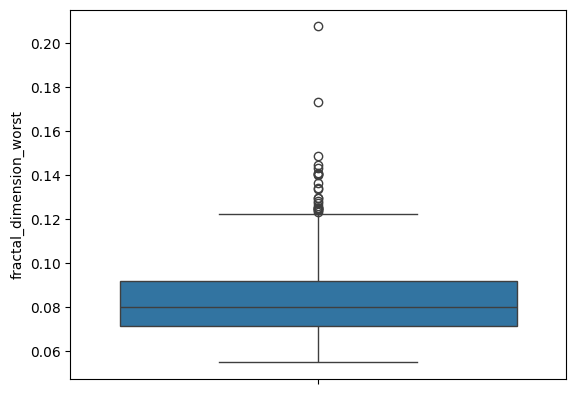

In [47]:
for i in df.columns:
  if df[i].dtype=='int64' or df[i].dtype=='float64':
      sns.boxplot(df[i])
      plt.show()

In [48]:
for i in df.columns:
  if df[i].dtype=='int64' or df[i].dtype=='float64':
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    upper=q3+1.5*iqr
    lower=q1-1.5*iqr
    df[i]=np.where(df[i]>upper,upper,np.where(df[i]<lower,lower,df[i]))

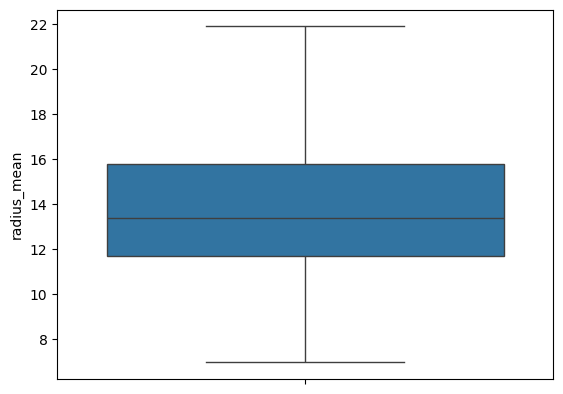

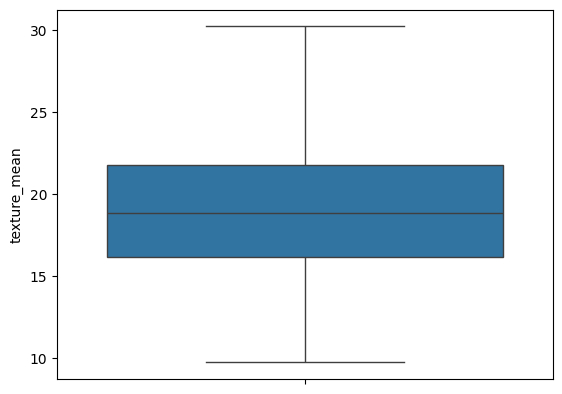

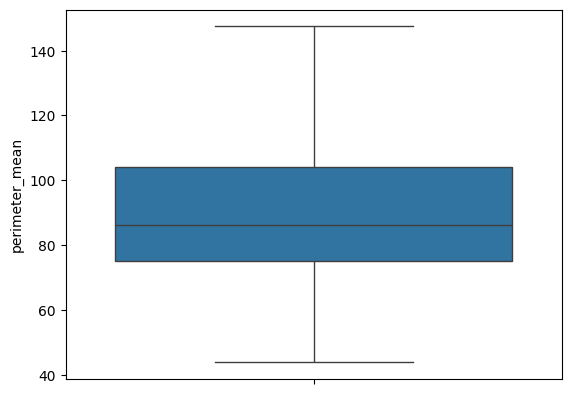

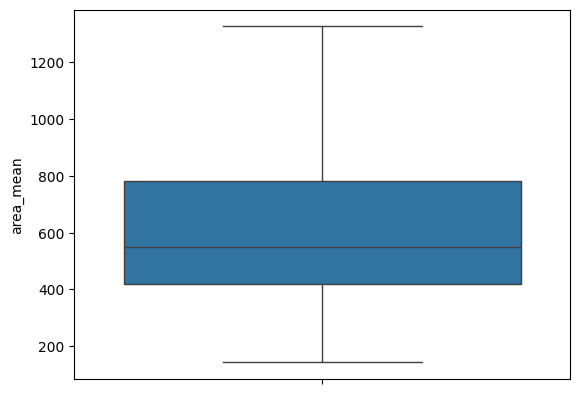

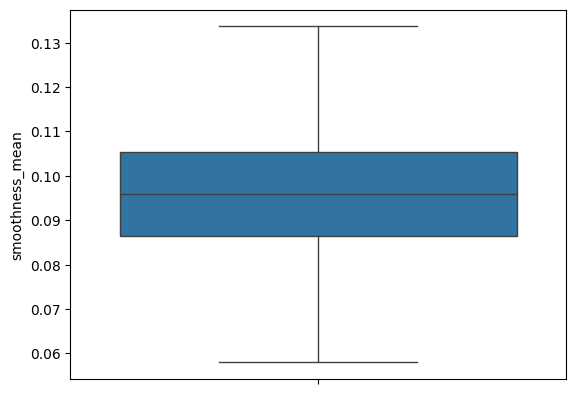

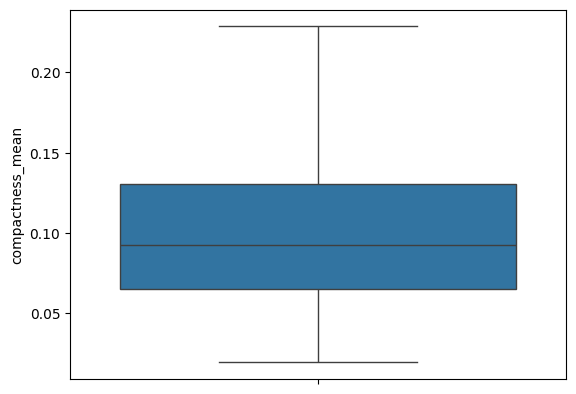

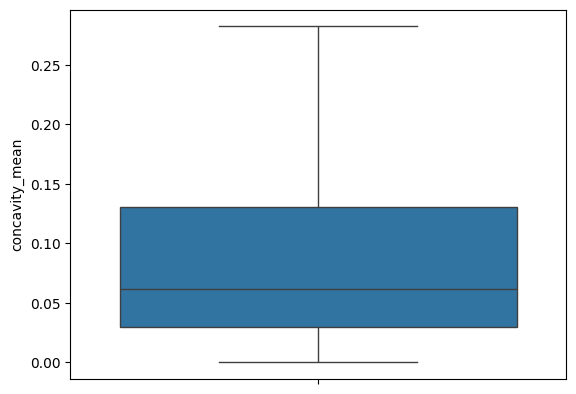

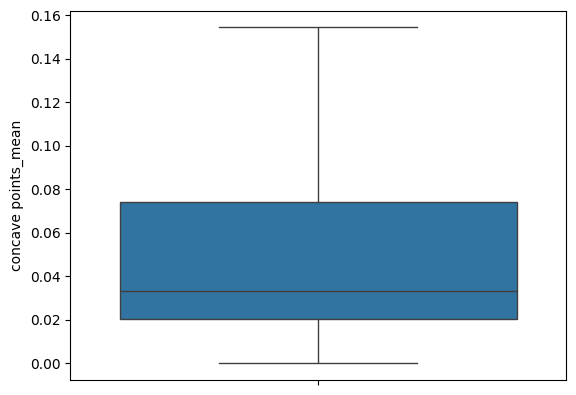

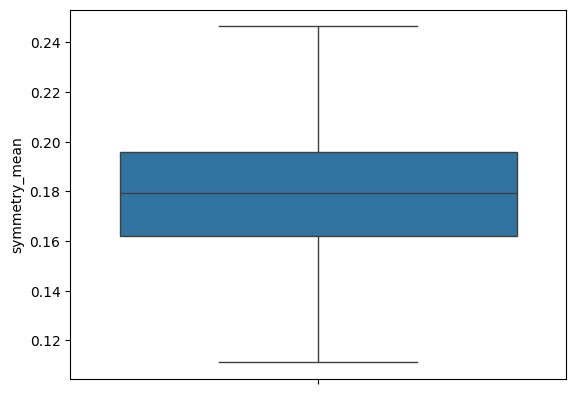

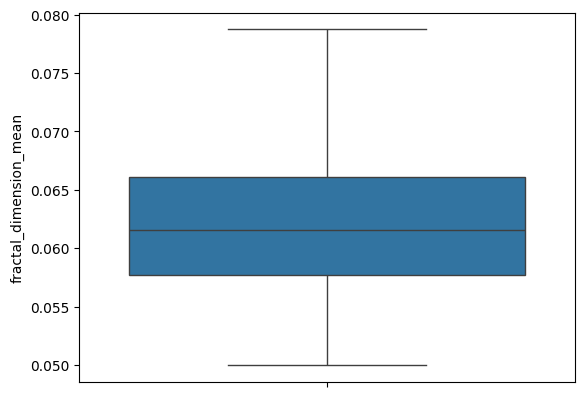

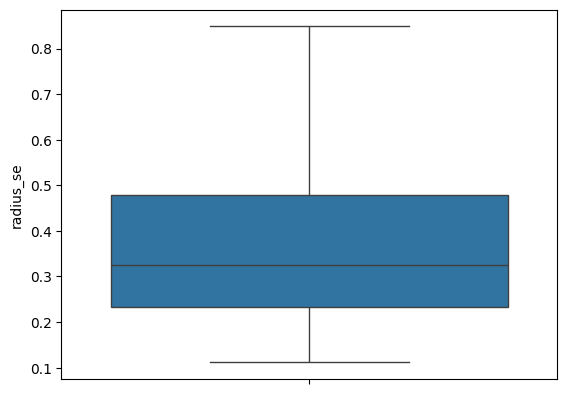

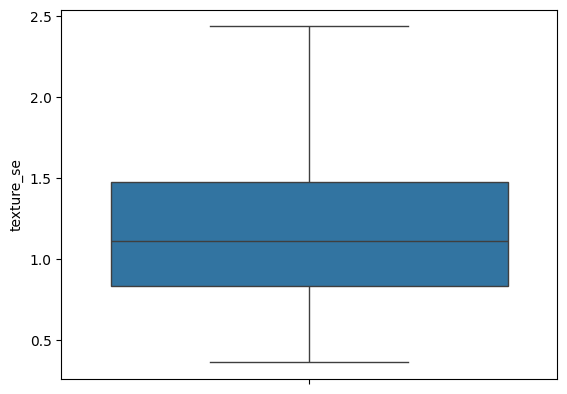

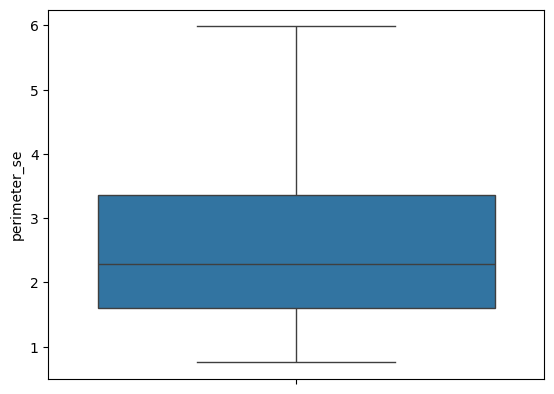

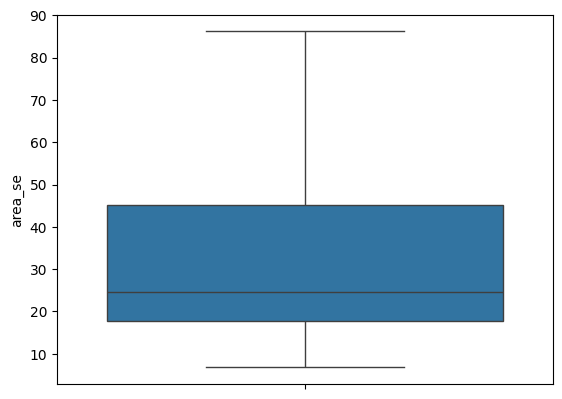

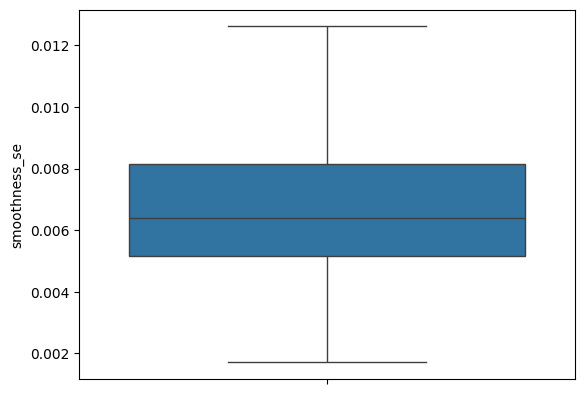

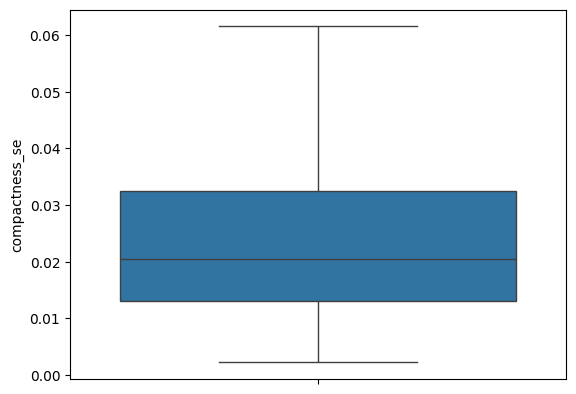

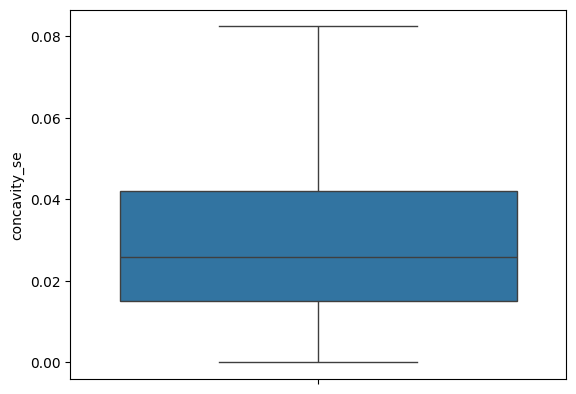

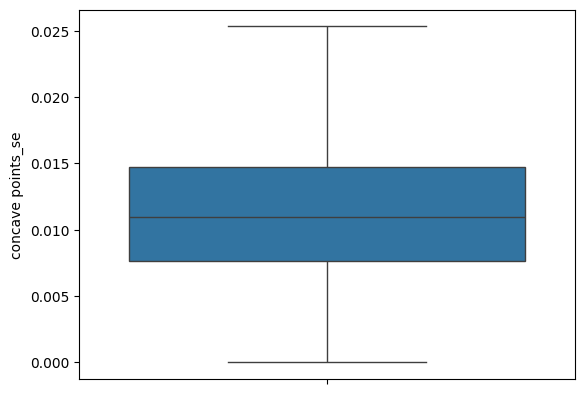

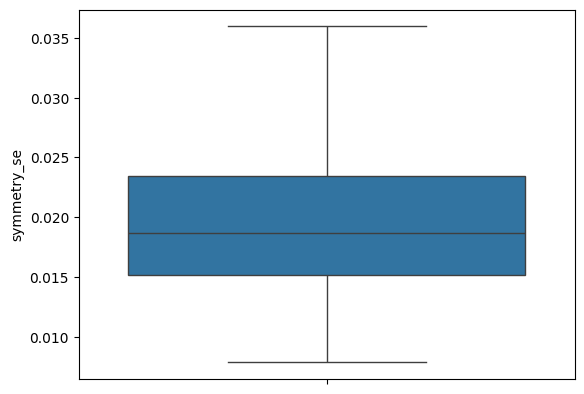

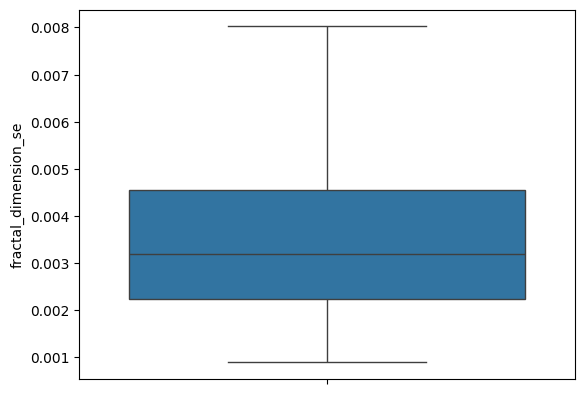

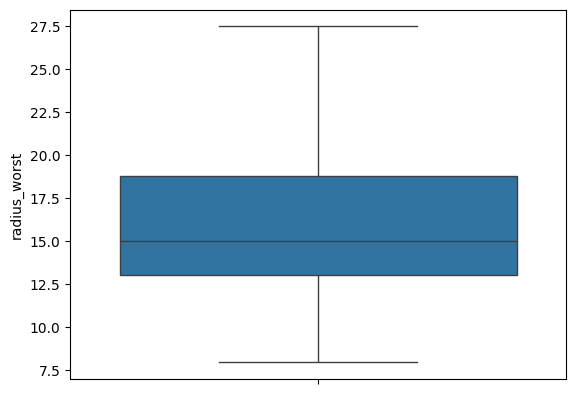

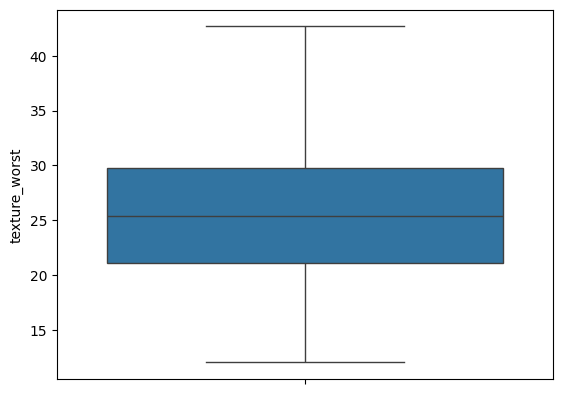

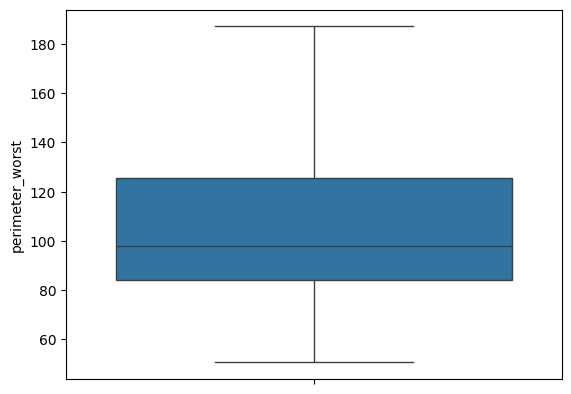

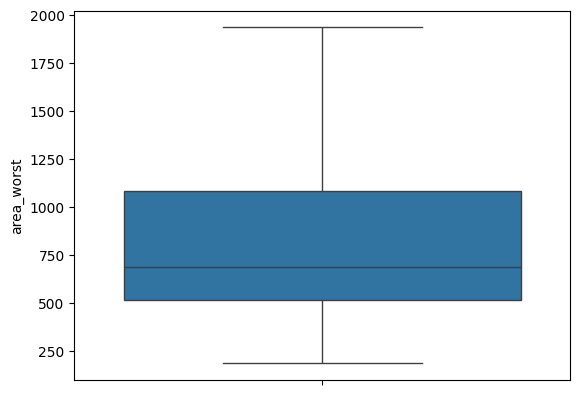

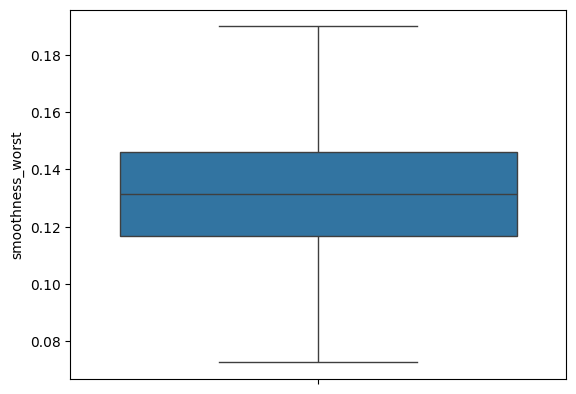

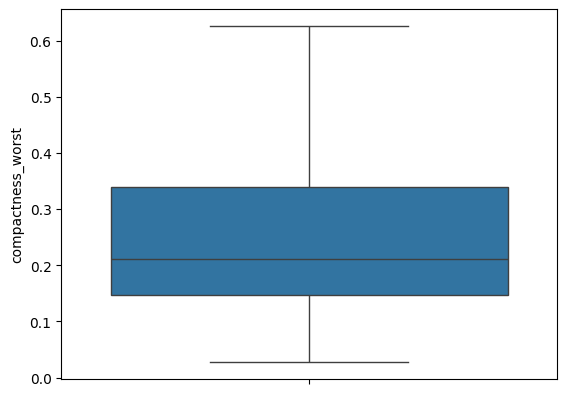

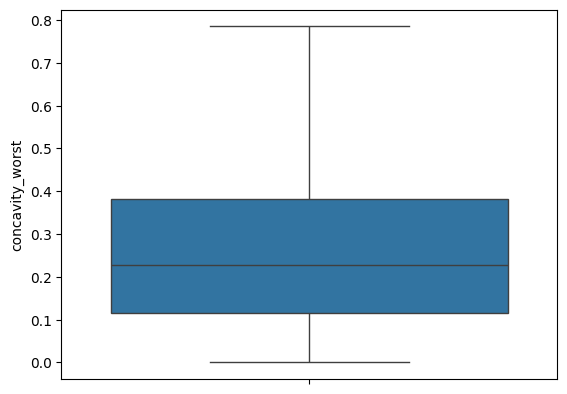

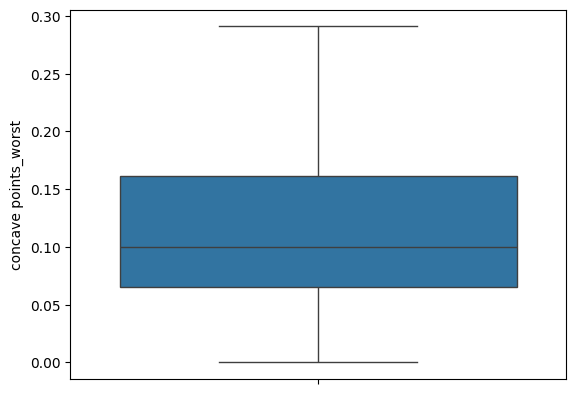

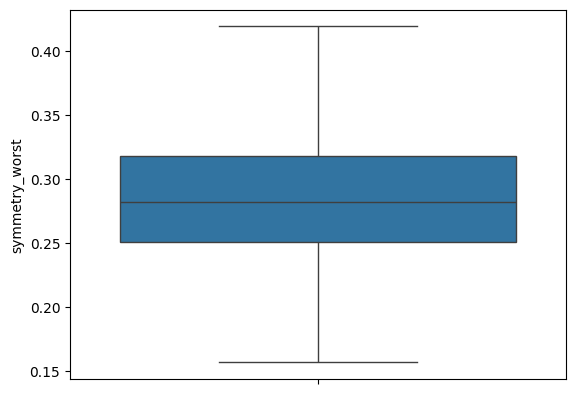

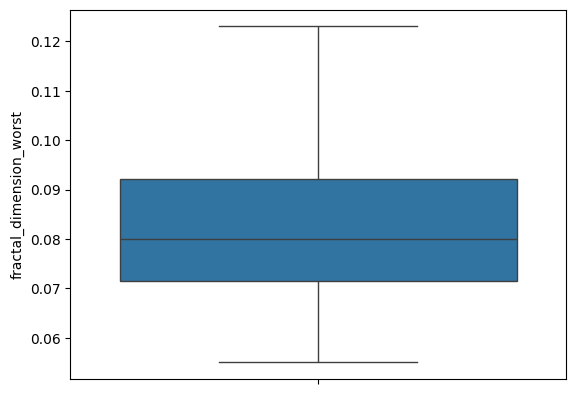

In [49]:
for i in df.columns:
  if df[i].dtype=='int64' or df[i].dtype=='float64':
      sns.boxplot(df[i])
      plt.show()

In [50]:
x=df.drop('diagnosis',axis=1)
y=df['diagnosis']

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

model1=LogisticRegression()
model1.fit(x_train,y_train)
y_pred=model1.predict(x_test)
print(accuracy_score(y_test,y_pred))




0.9649122807017544


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import classification_report

report_dict = classification_report(y_test, y_pred, output_dict=True)
report_dict

{'B': {'precision': 0.958904109589041,
  'recall': 0.9859154929577465,
  'f1-score': 0.9722222222222222,
  'support': 71.0},
 'M': {'precision': 0.975609756097561,
  'recall': 0.9302325581395349,
  'f1-score': 0.9523809523809523,
  'support': 43.0},
 'accuracy': 0.9649122807017544,
 'macro avg': {'precision': 0.9672569328433009,
  'recall': 0.9580740255486406,
  'f1-score': 0.9623015873015872,
  'support': 114.0},
 'weighted avg': {'precision': 0.9652053622194477,
  'recall': 0.9649122807017544,
  'f1-score': 0.9647382344750765,
  'support': 114.0}}

In [ ]:
import mlflow

In [ ]:
mlflow.set_tracking_uri("https://73ddeaffb6f2.ngrok-free.app")
mlflow.set_experiment("Breast Cancer Prediction (Logistic Regression)")


<Experiment: artifact_location='mlflow-artifacts:/891147630145012847', creation_time=1753725365570, experiment_id='891147630145012847', last_update_time=1753725365570, lifecycle_stage='active', name='Breast Cancer Prediction (Logistic Regression)', tags={}>

In [ ]:
params={

    "test_size":0.2,
    "random_state":42,
    "model":"Logistic Regression"
}

metrics = {
        "accuracy": accuracy_score(y_test, y_pred),
        "precision_B": report_dict["B"]["precision"],
        "recall_B": report_dict["B"]["recall"],
        "f1_B": report_dict["B"]["f1-score"],
        "precision_M": report_dict["M"]["precision"],
        "recall_M": report_dict["M"]["recall"],
        "f1_M": report_dict["M"]["f1-score"],
        "macro_f1": report_dict["macro avg"]["f1-score"],
        "weighted_f1": report_dict["weighted avg"]["f1-score"]
    }

In [ ]:
with mlflow.start_run(run_name="outlier removal - Boxplot"):
  mlflow.log_params(params)
  mlflow.log_metrics(metrics)

 # Log model
  mlflow.sklearn.log_model(model1, "outlier model")

2025/07/29 03:08:38 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/29 03:08:48 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run outlier removal - Boxplot at: https://73ddeaffb6f2.ngrok-free.app/#/experiments/891147630145012847/runs/f3989300eb474f22b989443fcc5178ab
🧪 View experiment at: https://73ddeaffb6f2.ngrok-free.app/#/experiments/891147630145012847


# **2- Z Score Removal**

In [52]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [53]:
x=df.drop('diagnosis',axis=1)
y=df['diagnosis']

In [54]:
from scipy.stats import zscore
z=np.abs(zscore(x))
threshold=2.5
new_x=x[(z<2.5).all(axis=1)]
new_y=y[(z<2.5).all(axis=1)]

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

x_train,x_test,y_train,y_test=train_test_split(new_x,new_y,test_size=0.2,random_state=42)

model1=LogisticRegression()
model1.fit(x_train,y_train)
y_pred=model1.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           B       0.91      0.95      0.93        64
           M       0.88      0.79      0.84        29

    accuracy                           0.90        93
   macro avg       0.90      0.87      0.88        93
weighted avg       0.90      0.90      0.90        93



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import classification_report

report_dict = classification_report(y_test, y_pred, output_dict=True)
report_dict

{'B': {'precision': 0.9090909090909091,
  'recall': 0.9523809523809523,
  'f1-score': 0.9302325581395349,
  'support': 63.0},
 'M': {'precision': 0.8846153846153846,
  'recall': 0.7931034482758621,
  'f1-score': 0.8363636363636363,
  'support': 29.0},
 'accuracy': 0.9021739130434783,
 'macro avg': {'precision': 0.8968531468531469,
  'recall': 0.8727422003284072,
  'f1-score': 0.8832980972515856,
  'support': 92.0},
 'weighted avg': {'precision': 0.9013757981149285,
  'recall': 0.9021739130434783,
  'f1-score': 0.9006434414927843,
  'support': 92.0}}

In [ ]:
params={

    "test_size":0.2,
    "random_state":42,
    "model":"Logistic Regression"
}

metrics = {
        "accuracy": accuracy_score(y_test, y_pred),
        "precision_B": report_dict["B"]["precision"],
        "recall_B": report_dict["B"]["recall"],
        "f1_B": report_dict["B"]["f1-score"],
        "precision_M": report_dict["M"]["precision"],
        "recall_M": report_dict["M"]["recall"],
        "f1_M": report_dict["M"]["f1-score"],
        "macro_f1": report_dict["macro avg"]["f1-score"],
        "weighted_f1": report_dict["weighted avg"]["f1-score"]
    }

In [ ]:
mlflow.start_run(run_name="Outlier Removal - Z Score")
mlflow.log_params(params)
mlflow.log_metrics(metrics)

 # Log model
mlflow.sklearn.log_model(model1, "outlier model")

2025/07/29 03:30:51 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/29 03:30:58 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


# 3- Cook's Distance

In [19]:
df=pd.read_csv('cancer_clean.csv')

In [20]:
x=df.drop('diagnosis',axis=1)
y=df['diagnosis']

In [16]:
!pip install statsmodels --quiet

In [22]:
import statsmodels.api as sm

y_numeric = y.map({'M': 1, 'B': 0})

X_numeric = x.apply(pd.to_numeric, errors='coerce')
X_numeric = sm.add_constant(X_numeric)


ols_model = sm.OLS(y_numeric, X_numeric).fit()

influence = ols_model.get_influence()
cooks_d, p_values = influence.cooks_distance

threshold_cook = 4 / len(X_numeric)

cooks_df = pd.DataFrame({
    'Cooks_Distance': cooks_d,
    'Above_Threshold': cooks_d > threshold_cook
})

Top 10 influential points by Cook's Distance:
     Cooks_Distance  Above_Threshold
38         0.182210             True
12         0.072043             True
192        0.063577             True
190        0.047667             True
213        0.045392             True
108        0.027814             True
567        0.026144             True
71         0.025260             True
379        0.018948             True
297        0.018773             True
152        0.017545             True
489        0.016820             True
116        0.016726             True
212        0.014869             True
194        0.014516             True
81         0.013722             True
180        0.013388             True
290        0.013060             True
78         0.012753             True
323        0.012529             True
368        0.012403             True
41         0.011245             True
39         0.010872             True
146        0.010516             True
197        0.010512          

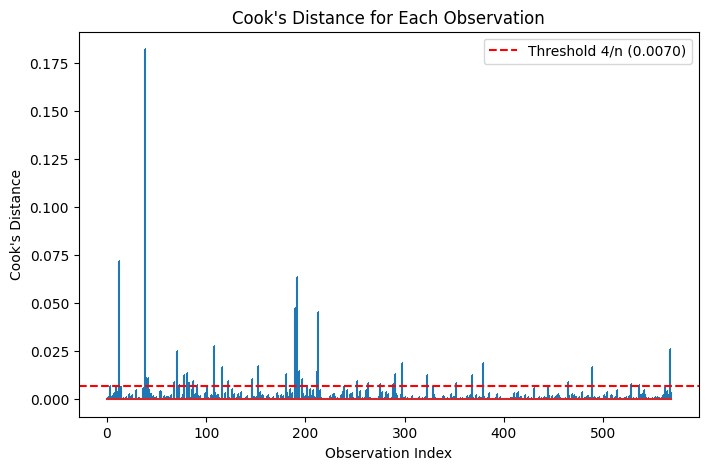

In [25]:
# Show top influential points
print("Top 10 influential points by Cook's Distance:")
print(cooks_df.sort_values(by='Cooks_Distance', ascending=False).head(50))

# Plot Cook's Distance
plt.figure(figsize=(8, 5))
plt.stem(np.arange(len(cooks_d)), cooks_d, markerfmt=",")
plt.axhline(threshold_cook, color='red', linestyle='--', label=f'Threshold 4/n ({threshold_cook:.4f})')
plt.xlabel('Observation Index')
plt.ylabel("Cook's Distance")
plt.title("Cook's Distance for Each Observation")
plt.legend()
plt.show()

In [26]:
mask_cook = cooks_d < threshold_cook
final_x = x[mask_cook]
final_y = y[mask_cook]

In [27]:
print(f"Shape before Cook's filtering: {x.shape}")
print(f"Shape after Cook's filtering: {final_x.shape}")

Shape before Cook's filtering: (569, 30)
Shape after Cook's filtering: (528, 30)


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

x_train,x_test,y_train,y_test=train_test_split(final_x,final_y,test_size=0.2,random_state=42)

model1=LogisticRegression()
model1.fit(x_train,y_train)
y_pred=model1.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           B       0.97      0.96      0.97        72
           M       0.91      0.94      0.93        34

    accuracy                           0.95       106
   macro avg       0.94      0.95      0.95       106
weighted avg       0.95      0.95      0.95       106



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
from sklearn.metrics import classification_report

report_dict = classification_report(y_test, y_pred, output_dict=True)
report_dict

{'B': {'precision': 0.971830985915493,
  'recall': 0.9583333333333334,
  'f1-score': 0.965034965034965,
  'support': 72.0},
 'M': {'precision': 0.9142857142857143,
  'recall': 0.9411764705882353,
  'f1-score': 0.927536231884058,
  'support': 34.0},
 'accuracy': 0.9528301886792453,
 'macro avg': {'precision': 0.9430583501006036,
  'recall': 0.9497549019607843,
  'f1-score': 0.9462855984595115,
  'support': 106.0},
 'weighted avg': {'precision': 0.9533730686002809,
  'recall': 0.9528301886792453,
  'f1-score': 0.9530070694959948,
  'support': 106.0}}

In [30]:
params={

    "test_size":0.2,
    "random_state":42,
    "model":"Logistic Regression"
}

metrics = {
        "accuracy": accuracy_score(y_test, y_pred),
        "precision_B": report_dict["B"]["precision"],
        "recall_B": report_dict["B"]["recall"],
        "f1_B": report_dict["B"]["f1-score"],
        "precision_M": report_dict["M"]["precision"],
        "recall_M": report_dict["M"]["recall"],
        "f1_M": report_dict["M"]["f1-score"],
        "macro_f1": report_dict["macro avg"]["f1-score"],
        "weighted_f1": report_dict["weighted avg"]["f1-score"]
    }

In [39]:
mlflow.set_tracking_uri("https://0e2dde07fdb8.ngrok-free.app")
mlflow.set_experiment("Breast Cancer Prediction (Logistic Regression)")



# Now start a new one
with mlflow.start_run(run_name="Outlier Removal - Cook's Distance") as run:
    mlflow.log_params(params)
    mlflow.log_metrics(metrics)
    mlflow.sklearn.log_model(model1, "Outlier Model")

print("Run logged with ID:", run.info.run_id)

2025/08/10 12:30:35 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/08/10 12:30:44 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Outlier Removal - Cook's Distance at: https://0e2dde07fdb8.ngrok-free.app/#/experiments/891147630145012847/runs/a727491e614947b9b7bdf2ab4562ce4b
🧪 View experiment at: https://0e2dde07fdb8.ngrok-free.app/#/experiments/891147630145012847
Run logged with ID: a727491e614947b9b7bdf2ab4562ce4b


# **Encoding** :

In [56]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df['diagnosis']=le.fit_transform(df['diagnosis'])

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

# **RFE - Recursive Feature Elimination**

In [67]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()  # Create a logistic regression model so we can try RFE on this to select import feature for FINAL MODEL

rfe = RFE(model1)  # Apply RFE on the model that you have created
rfe.fit(x,y)  # Pass your indepenetn and dependent data to RFE for doing feature selection

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

RFE(estimator=LogisticRegression())

In [68]:
column_name = x.columns
column_name

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [69]:
important_column_index = [ i for i , data in enumerate(rfe.support_) if data ==True]
# Index of the column that are important
important_column_index

[0, 2, 4, 5, 6, 7, 8, 10, 11, 20, 21, 26, 27, 28, 29]

In [70]:
# Use index to get the name of important columns
selected_Columns_name = [column_name[i] for i in important_column_index ]
selected_Columns_name

['radius_mean',
 'perimeter_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'radius_se',
 'texture_se',
 'radius_worst',
 'texture_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [72]:
x=x.loc[: , ['radius_mean',
 'perimeter_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'radius_se',
 'texture_se',
 'radius_worst',
 'texture_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']]

y=df["diagnosis"]

In [73]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split( x , y , test_size=0.2 , random_state=0)

final_model = LogisticRegression()

final_model.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [74]:
y_pred = final_model.predict(x_test)

In [75]:
from sklearn.metrics import classification_report

report_dict = classification_report(y_test, y_pred, output_dict=True)
report_dict

{'0': {'precision': 0.9848484848484849,
  'recall': 0.9701492537313433,
  'f1-score': 0.9774436090225563,
  'support': 67.0},
 '1': {'precision': 0.9583333333333334,
  'recall': 0.9787234042553191,
  'f1-score': 0.968421052631579,
  'support': 47.0},
 'accuracy': 0.9736842105263158,
 'macro avg': {'precision': 0.9715909090909092,
  'recall': 0.9744363289933312,
  'f1-score': 0.9729323308270676,
  'support': 114.0},
 'weighted avg': {'precision': 0.9739167995746943,
  'recall': 0.9736842105263158,
  'f1-score': 0.9737237831420656,
  'support': 114.0}}

In [135]:
model_f = LogisticRegression(penalty='l1', solver='liblinear', C=0.09, max_iter=500)


model_f.fit(x_train, y_train)

y_pred = model_f.predict(x_test)

report_dict = classification_report(y_test, y_pred, output_dict=True)
report_dict

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


{'0': {'precision': 0.881578947368421,
  'recall': 1.0,
  'f1-score': 0.9370629370629371,
  'support': 67.0},
 '1': {'precision': 1.0,
  'recall': 0.8085106382978723,
  'f1-score': 0.8941176470588236,
  'support': 47.0},
 'accuracy': 0.9210526315789473,
 'macro avg': {'precision': 0.9407894736842105,
  'recall': 0.9042553191489362,
  'f1-score': 0.9155902920608803,
  'support': 114.0},
 'weighted avg': {'precision': 0.9304016620498614,
  'recall': 0.9210526315789473,
  'f1-score': 0.9193574227629955,
  'support': 114.0}}

In [141]:
params={

    "test_size":0.2,
    "random_state":42,
    "model":"Logistic Regression"
}

metrics = {
        "accuracy": accuracy_score(y_test, y_pred),
        "precision_B": report_dict["0"]["precision"],
        "recall_B": report_dict["0"]["recall"],
        "f1_B": report_dict["0"]["f1-score"],
        "precision_M": report_dict["1"]["precision"],
        "recall_M": report_dict["1"]["recall"],
        "f1_M": report_dict["1"]["f1-score"],
        "macro_f1": report_dict["macro avg"]["f1-score"],
        "weighted_f1": report_dict["weighted avg"]["f1-score"]
    }

In [145]:
mlflow.set_tracking_uri("https://0e2dde07fdb8.ngrok-free.app")
mlflow.set_experiment("Breast Cancer Prediction (Logistic Regression)")



<Experiment: artifact_location='mlflow-artifacts:/891147630145012847', creation_time=1753725365570, experiment_id='891147630145012847', last_update_time=1753725365570, lifecycle_stage='active', name='Breast Cancer Prediction (Logistic Regression)', tags={}>

In [149]:
 mlflow.end_run("18711fe52a5749009d106b2b67293b81")

In [150]:
mlflow.start_run(run_name="Final Model..(With RFE)")
mlflow.log_params(params)
mlflow.log_metrics(metrics)

 # Log model
mlflow.sklearn.log_model(model_f, "Final Model")

2025/08/10 14:31:54 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/08/10 14:32:01 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [139]:
import pickle

with open('model_f.pkl', 'wb') as file:
    pickle.dump(model_f, file)